## Descriptive Statistics
This notebook teaches the way to summarize the important features of the data, often getting the mean and variance. 

## Generating a sample dataset

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from faker import Faker
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
fake = Faker()
length_data = 30

# Generate fake names for column Name
names = [fake.name() for _ in range(length_data)]

# Generate random values for column Age
random_values = np.random.randint(0, 101, size=(length_data,))

# Generate random values for column Distance from office
random_value2 = np.random.randint(100, 200, size=(length_data,))

# Create the DataFrame
fake_df = pd.DataFrame({'Name': names,
                        'Age': random_values,
                        'Distance from office': random_value2})



In [3]:
fake_df.index = fake_df.Name
del fake_df['Name']
fake_df.head()

,Age,Distance from office
Name,,
Heather Copeland,44,147
Jessica Dyer,47,164
Wendy Ryan,64,182
Amanda Smith,67,199
Cassandra Harvey,67,188


## Measures of center

Measures of center generally gives the "middle" of a numeric variable. Some of the measures of center include mean, median and mode. 

Mean is simply the sum of values divided by the total number of values

In [4]:
# To get mean of column
fake_df.mean()

Age                      57.166667
Distance from office    141.033333
dtype: float64

In [5]:
# To get mean of the required column
fake_df["Age"].mean()

57.166666666666664

Median is the middle number in the sorted ascending or descending list of numbers

In [6]:
# Calculating median
fake_df["Age"].median()

66.0

In [7]:
# Calculating mean for the row column

fake_df.mean(axis = 1).head()

Name
Heather Copeland     95.5
Jessica Dyer        105.5
Wendy Ryan          123.0
Amanda Smith        133.0
Cassandra Harvey    127.5
dtype: float64

Mode is the value that appears most frequently in a data set. Data can have one mode, multiple modes or no mode at all. 

In [8]:
fake_df.mode()

,Age,Distance from office
0,88.0,100
1,NaN,119
2,NaN,132


### Measures of spread
It explains how much the data tends to diverge from the typical value. Also, it gives how much the data tends to diverge from the typical value.

The spread is measured by the Range. It is the distance between teh maximum and minimum observations.

In [9]:
max(fake_df["Age"] - min(fake_df["Age"]))

79

### Calculation of quantiles and percentiles
It helps to calculate the spread of data and the 50% quantile is median. The quantiles are used to calculate inter quantile range.

In [10]:
quantiles = [fake_df["Age"].quantile(0),
             fake_df["Age"].quantile(0.25),
             fake_df["Age"].quantile(0.5),
             fake_df["Age"].quantile(0.75),
             fake_df["Age"].quantile(1)]

quantiles

[9.0, 37.5, 66.0, 79.75, 88.0]

The df.describe() gives the summary which includes the mean, standard deviation, empty values, percentiles, minimum and maximum values.

In [11]:
fake_df["Age"].describe()

count    30.000000
mean     57.166667
std      26.311245
min       9.000000
25%      37.500000
50%      66.000000
75%      79.750000
max      88.000000
Name: Age, dtype: float64

In [12]:
# Calculating inter quartile range
fake_df["Age"].quantile(0.75) - fake_df["Age"].quantile(0.25)

42.25

### Box plot for the above statistics

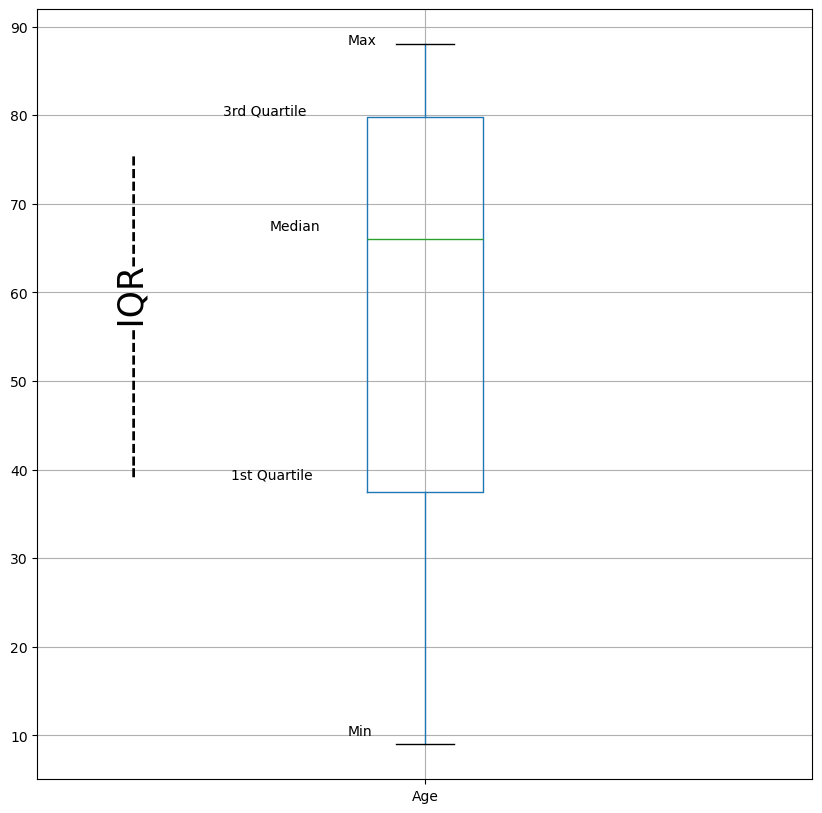

In [31]:
fake_df.boxplot(column = "Age",
               return_type = "axes",
               figsize = (10,10))

plt.text(x=0.74, y=80, s="3rd Quartile")
plt.text(x=0.8, y=67, s="Median")
plt.text(x=0.75, y=39, s="1st Quartile")
plt.text(x=0.9, y=10, s="Min")
plt.text(x=0.9, y=88, s="Max")
plt.text(x=0.6, y=40, s="------------IQR---------", rotation=90, size=25);


The **variance** of a distribution is the average of the differences of points from the mean and is expressed in terms of units squared. **The standard deviation** is the square root of the variance and is expressed in the same units as the variable. Since variance and standard deviation use the mean, they are influenced by skewed data and outliers.

Therefore, the **Median Absolute Deviation** is used to measure the spread of the median. As it uses the median to calculate the deviation, and since the median is not influenced by skewed data and outliers

##### Calaculating variance

In [14]:
fake_df["Age"].var()

692.2816091954023

##### Calculating standard deviation

In [15]:
fake_df["Age"].std()

26.31124491914821

##### Calcualting median absolute deviation

In [16]:
mad = abs(fake_df["Age"].median() - fake_df["Age"])

mad.median()

20.5

## Skewness and Kurtosis

In [17]:
fake_df["Age"].skew()

-0.5360930847807014

In [18]:
fake_df["Age"].kurt()

-1.0373277778294647